In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import anndata
import os

from dredFISH.Design import PNMF
from dredFISH.Utils import basicu
from dredFISH.Utils.__init__plots import * 

import importlib
importlib.reload(PNMF)


<module 'dredFISH.Design.PNMF' from '/bigstore/GeneralStorage/fangming/projects/dredfish/packages/dredFISH/dredFISH/Design/PNMF.py'>

In [2]:
prj_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/'
dat_dir = prj_dir + 'data/'
res_dir = prj_dir + 'res_dpnmf/v_python'
print(res_dir)
fig_dir = prj_dir + 'figures/'

# data (old)
scrna_genes_path = '/bigstore/GeneralStorage/fangming/projects/dredfish/data/rna/scrna_ss_ctxhippo_a_exon_DPNMF_genes_matrix.h5ad'
adata = anndata.read_h5ad(scrna_genes_path) # library size normed (no log)
X = np.array(adata.X.todense()).copy() # already library size normalized
# adata

# data (CPM with rep)
# scrna_genes_path = '/bigstore/GeneralStorage/fangming/projects/dredfish/res_dpnmf/smrt_withrep_X_subL5n100.npy'
## allen scrna matrix (CPM; only 10k genes)
# X = np.load(scrna_genes_path, allow_pickle=True).T # cell by gene
# X.sum(axis=1)

/bigstore/GeneralStorage/fangming/projects/dredfish/res_dpnmf/v_python


In [3]:
%%time
logX = np.log10(X+1)
X.shape, logX.shape

CPU times: user 9.1 s, sys: 1.04 s, total: 10.1 s
Wall time: 10.1 s


((73347, 5576), (73347, 5576))

In [4]:
%%time
# run PNMF logtrans -- recommended by them
# w_pca, rec_pca = PNMF.get_PNMF(logX.T, init='pca', k=24, verbose=True, report_stride=10)
# w_p2x, rec_p2x = PNMF.get_PNMF(logX.T, init='pca_2x', k=24, verbose=True, report_stride=10)
# w_nrm, rec_nrm = PNMF.get_PNMF(logX.T, init='normal', k=24, verbose=True, report_stride=10)
# w_uni, rec_uni = PNMF.get_PNMF(logX.T, init='uniform', k=24, verbose=True, report_stride=10)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


In [5]:
%%time
# # # # run PNMF orig -- what we do and have to do
w_pca, rec_pca = PNMF.get_PNMF(X.T, init='pca',     k=24, verbose=True, report_stride=30)
w_p2x, rec_p2x = PNMF.get_PNMF(X.T, init='pca_2x',  k=24, verbose=True, report_stride=30)
w_nrm, rec_nrm = PNMF.get_PNMF(X.T, init='normal',  k=24, verbose=True, report_stride=30)
w_uni, rec_uni = PNMF.get_PNMF(X.T, init='uniform', k=24, verbose=True, report_stride=30)

0 0.3471620717312227
30 0.0015048111109194906
60 0.0006575046247501472
90 0.00033617870211960846
120 0.00033216397493499375
150 0.00032870712322760967
180 0.00018098008280011124
210 0.0001480957526682515
240 0.00011362023523298417
270 7.126708916505107e-05
300 7.943532889904351e-05
330 0.00032485643020607746
360 5.6445108493761303e-05
390 3.8062314449031215e-05
420 3.151637800150758e-05
450 2.4872454369554787e-05
480 1.9931852777720993e-05
510 1.7486695230589178e-05
540 1.5884343580963023e-05
570 1.4418595549319532e-05
600 1.2672277853247602e-05
630 1.0879821741459751e-05
0 0.49116751037969664
30 0.0027347591656143866
60 0.0010574016303478567
90 0.0003251288896687389
120 0.0001669197492128044
150 0.00010783642879659636
180 7.698048136951796e-05
210 5.654665293425374e-05
240 4.148559814296849e-05
270 3.0663928421832904e-05
300 2.2916201704581635e-05
330 1.7295466404335796e-05
360 1.3207851086642511e-05
390 1.0244859327651103e-05
0 0.5373017733144454
30 0.0001318847787840562
60 0.0005194

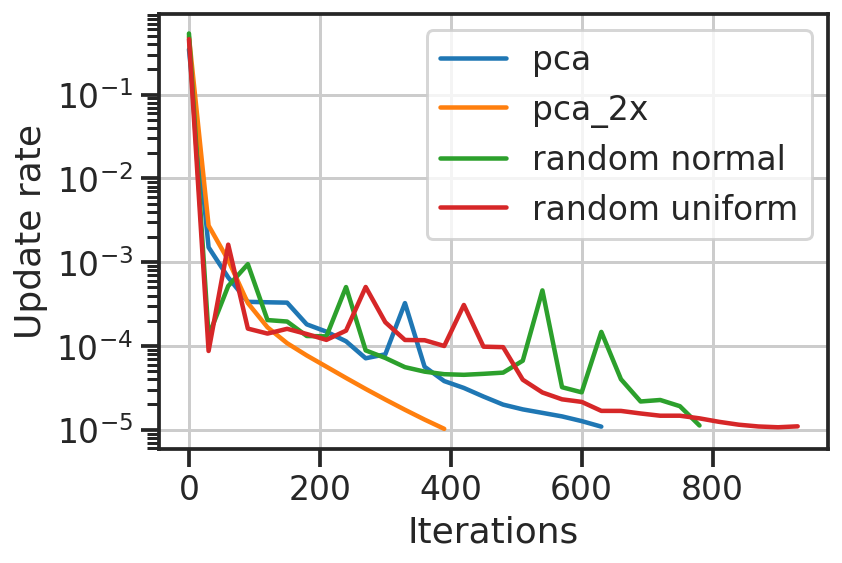

In [6]:
plt.plot(rec_pca[:,0], rec_pca[:,1], label='pca')
plt.plot(rec_p2x[:,0], rec_p2x[:,1], label='pca_2x')
plt.plot(rec_nrm[:,0], rec_nrm[:,1], label='random normal')
plt.plot(rec_uni[:,0], rec_uni[:,1], label='random uniform')
plt.xlabel('Iterations')
plt.ylabel('Update rate')
plt.legend()
plt.yscale('log')
# plt.xscale('log')

In [7]:
def plot(w, ax, vmax=None, reorder=True):
    if reorder:
        wnew, rows, cols = basicu.diag_matrix_rows(w)
    else:
        wnew = w
        
    sns.heatmap(
                # np.log10(wnew+1), 
                wnew,
                ax=ax, 
                cmap='rocket_r', 
                cbar_kws=dict(shrink=0.5),
                vmax=vmax,
               )

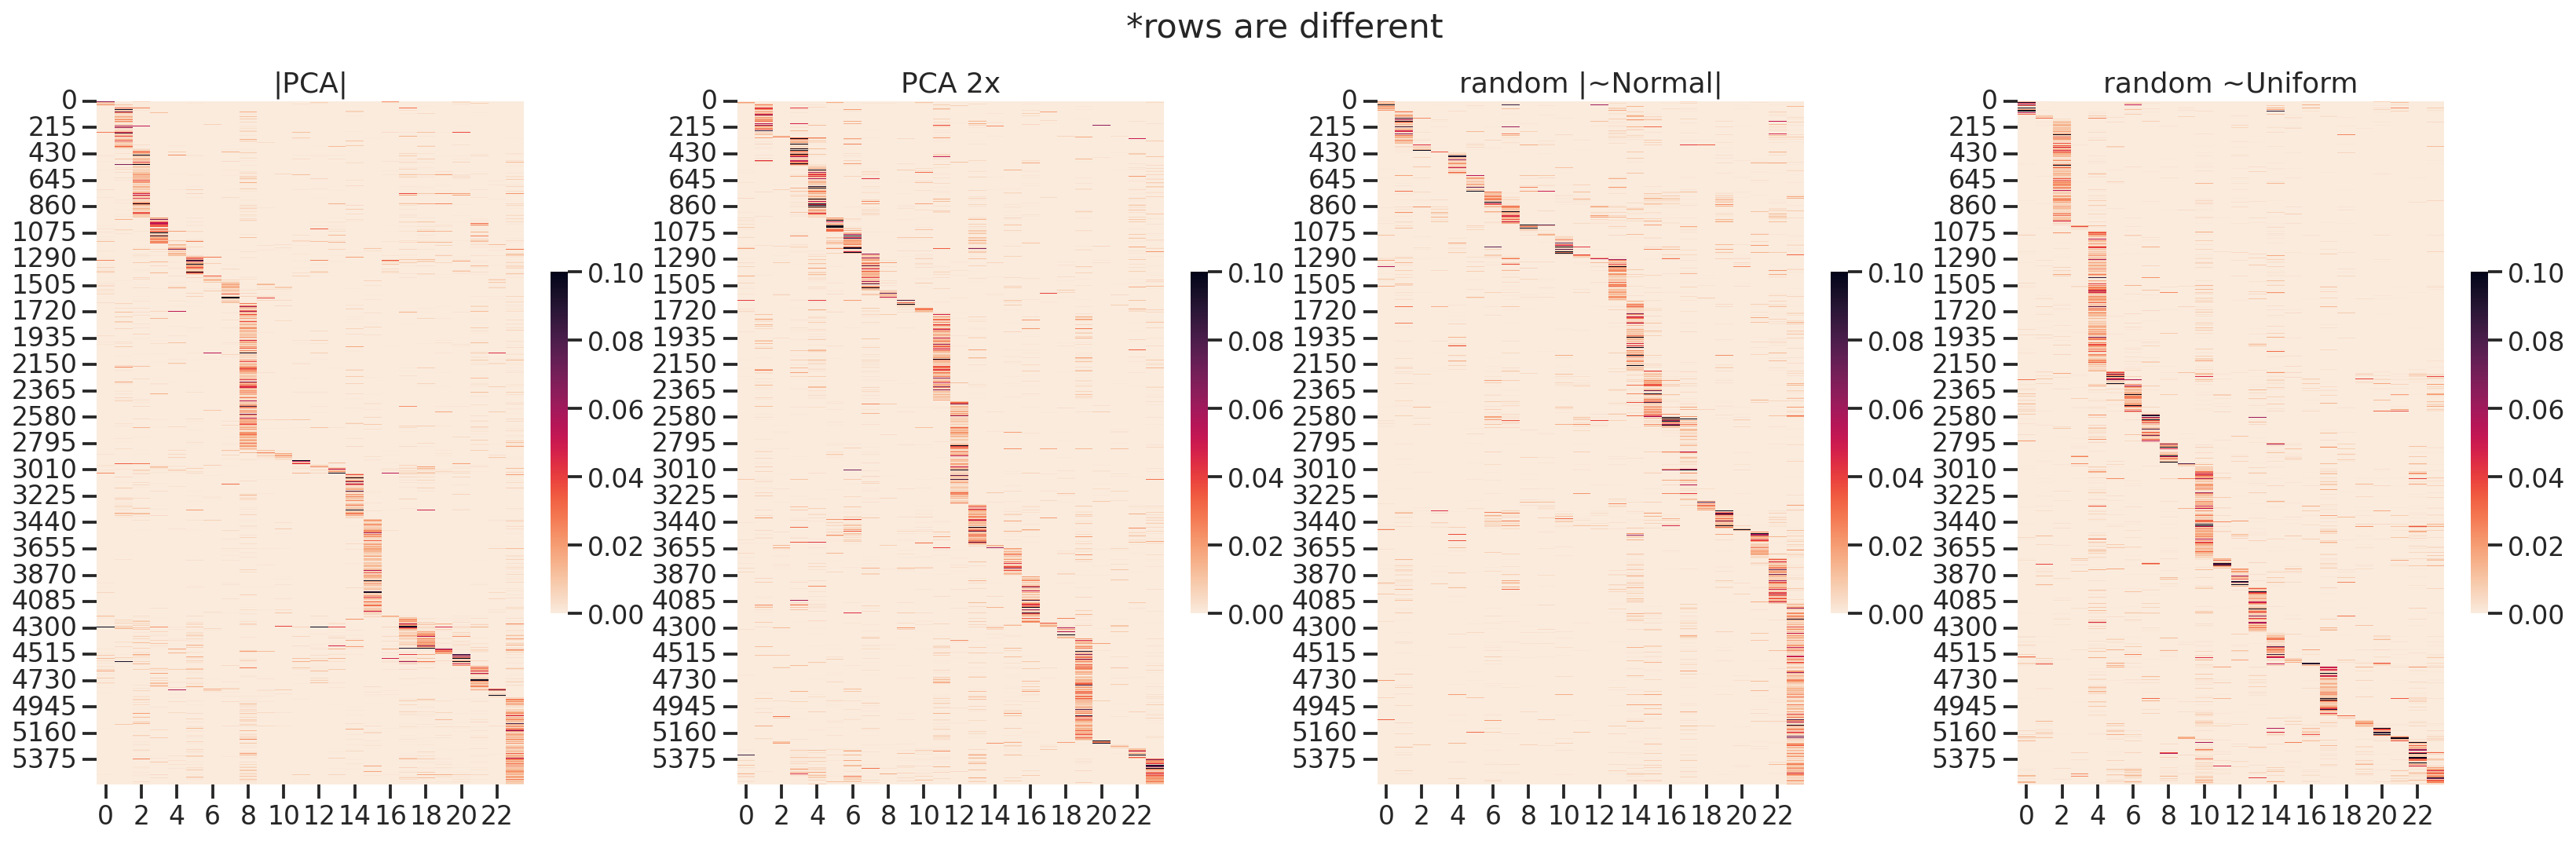

In [8]:
vmax = 0.1
# vmax = 0.03
fig, axs = plt.subplots(1, 4, figsize=(7*4,8))
ax = axs[0]
plot(w_pca, ax, vmax=vmax)
ax.set_title('|PCA|')

ax = axs[1]
plot(w_p2x, ax, vmax=vmax)
ax.set_title('PCA 2x')

ax = axs[2]
plot(w_nrm, ax, vmax=vmax)
ax.set_title('random |~Normal|')

ax = axs[3]
plot(w_uni, ax, vmax=vmax)
ax.set_title('random ~Uniform')
fig.suptitle('*rows are different')
plt.show()

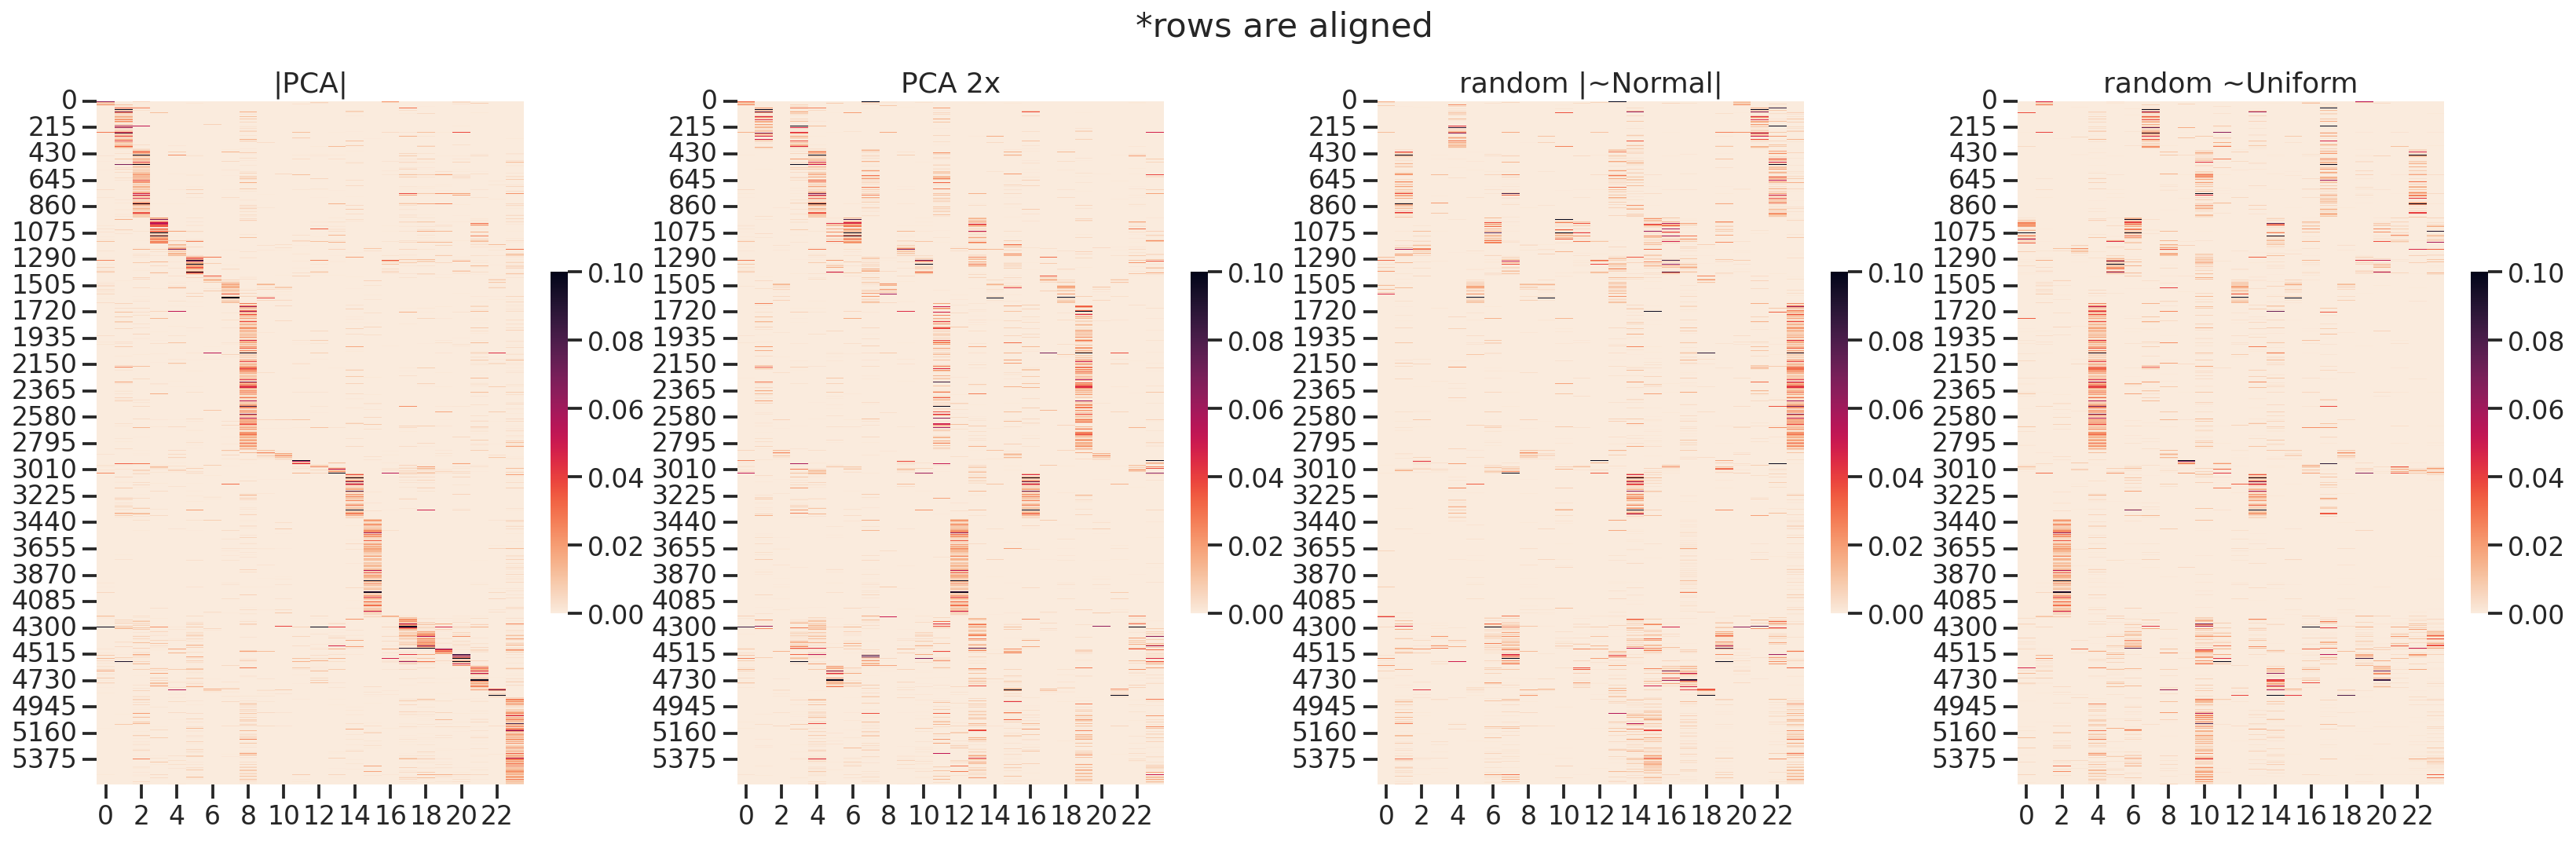

In [9]:
vmax = 0.1
# vmax = 0.03
# set the order
wnew, rows, cols = basicu.diag_matrix_rows(w_pca)
# wnew, rows, cols = basicu.diag_matrix_rows(w_p2x)

fig, axs = plt.subplots(1, 4, figsize=(7*4,8))
ax = axs[0]
wnew = w_pca[rows]
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('|PCA|')

ax = axs[1]
wnew = w_p2x[rows]
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('PCA 2x')

ax = axs[2]
wnew = w_nrm[rows]
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('random |~Normal|')

ax = axs[3]
wnew = w_uni[rows]
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('random ~Uniform')

fig.suptitle('*rows are aligned')
plt.show()

# save and validate these


In [10]:
output = os.path.join(res_dir, "smrt_X_v0.h5ad")
res_adata = anndata.AnnData(w_pca)
res_adata.layers['w_pca'] = w_pca
res_adata.layers['w_p2x'] = w_p2x
res_adata.layers['w_nrm'] = w_nrm
res_adata.layers['w_uni'] = w_uni
res_adata

AnnData object with n_obs × n_vars = 5576 × 24
    layers: 'w_pca', 'w_p2x', 'w_nrm', 'w_uni'

In [11]:
res_adata.write(output)

In [12]:
b = anndata.read(output)
b

AnnData object with n_obs × n_vars = 5576 × 24
    layers: 'w_nrm', 'w_p2x', 'w_pca', 'w_uni'